In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
#pip install xarray==v2023.06.0
import xarray as xr
from scipy import stats
from scipy import integrate
from numpy import exp
import math

from osgeo import gdal
import pyhdf
from pyhdf.SD import SD
import geopandas as gpd

import matplotlib as mpl
import matplotlib.pyplot as plt
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.ticker as mticker

In [2]:
## 789 anos, taiwan already excluded, scale factor already applied
ds_lai = xr.open_dataset('/portal1/dell/li-b/multiregression/lai.nc').sel(time=slice('2002-07-31', '2022-07-31'))
ds_ndvi = xr.open_dataset('/portal1/dell/li-b/multiregression/ndvi.nc').sel(time=slice('2002-07-01', '2022-07-01'))
ds_sif = xr.open_dataset('/portal1/dell/li-b/multiregression/sif.nc').sel(time=slice('2002-07-31', '2022-07-31'))
ds_et = xr.open_dataset('/portal1/dell/li-b/multiregression/et.nc').sel(time=slice('2002-07-31', '2022-07-31'))

In [3]:
z2 = ds_sif['vari'][20,:,:].values.ravel()
z3 = ds_et['vari'][20,:,:].values.ravel()
z0 = ds_lai['vari'][20,:,:].values.ravel()
z1 = ds_ndvi['vari'][20,:,:].values.ravel()

In [4]:
z0[z0>1.3] = np.nan
z0[z0<-0.8] = np.nan
z2[z2<-0.15] = np.nan
z2[z2>0.15] = np.nan
z1[z1>0.2] = np.nan
z1[z1<-0.2] = np.nan

/tmp/ipykernel_3071752/3624875201.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, fontweight='bold')
/tmp/ipykernel_3071752/3624875201.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, fontweight='bold')


Text(0.5, 1.0, 'Normalized SIF VS LAI Anomalies')

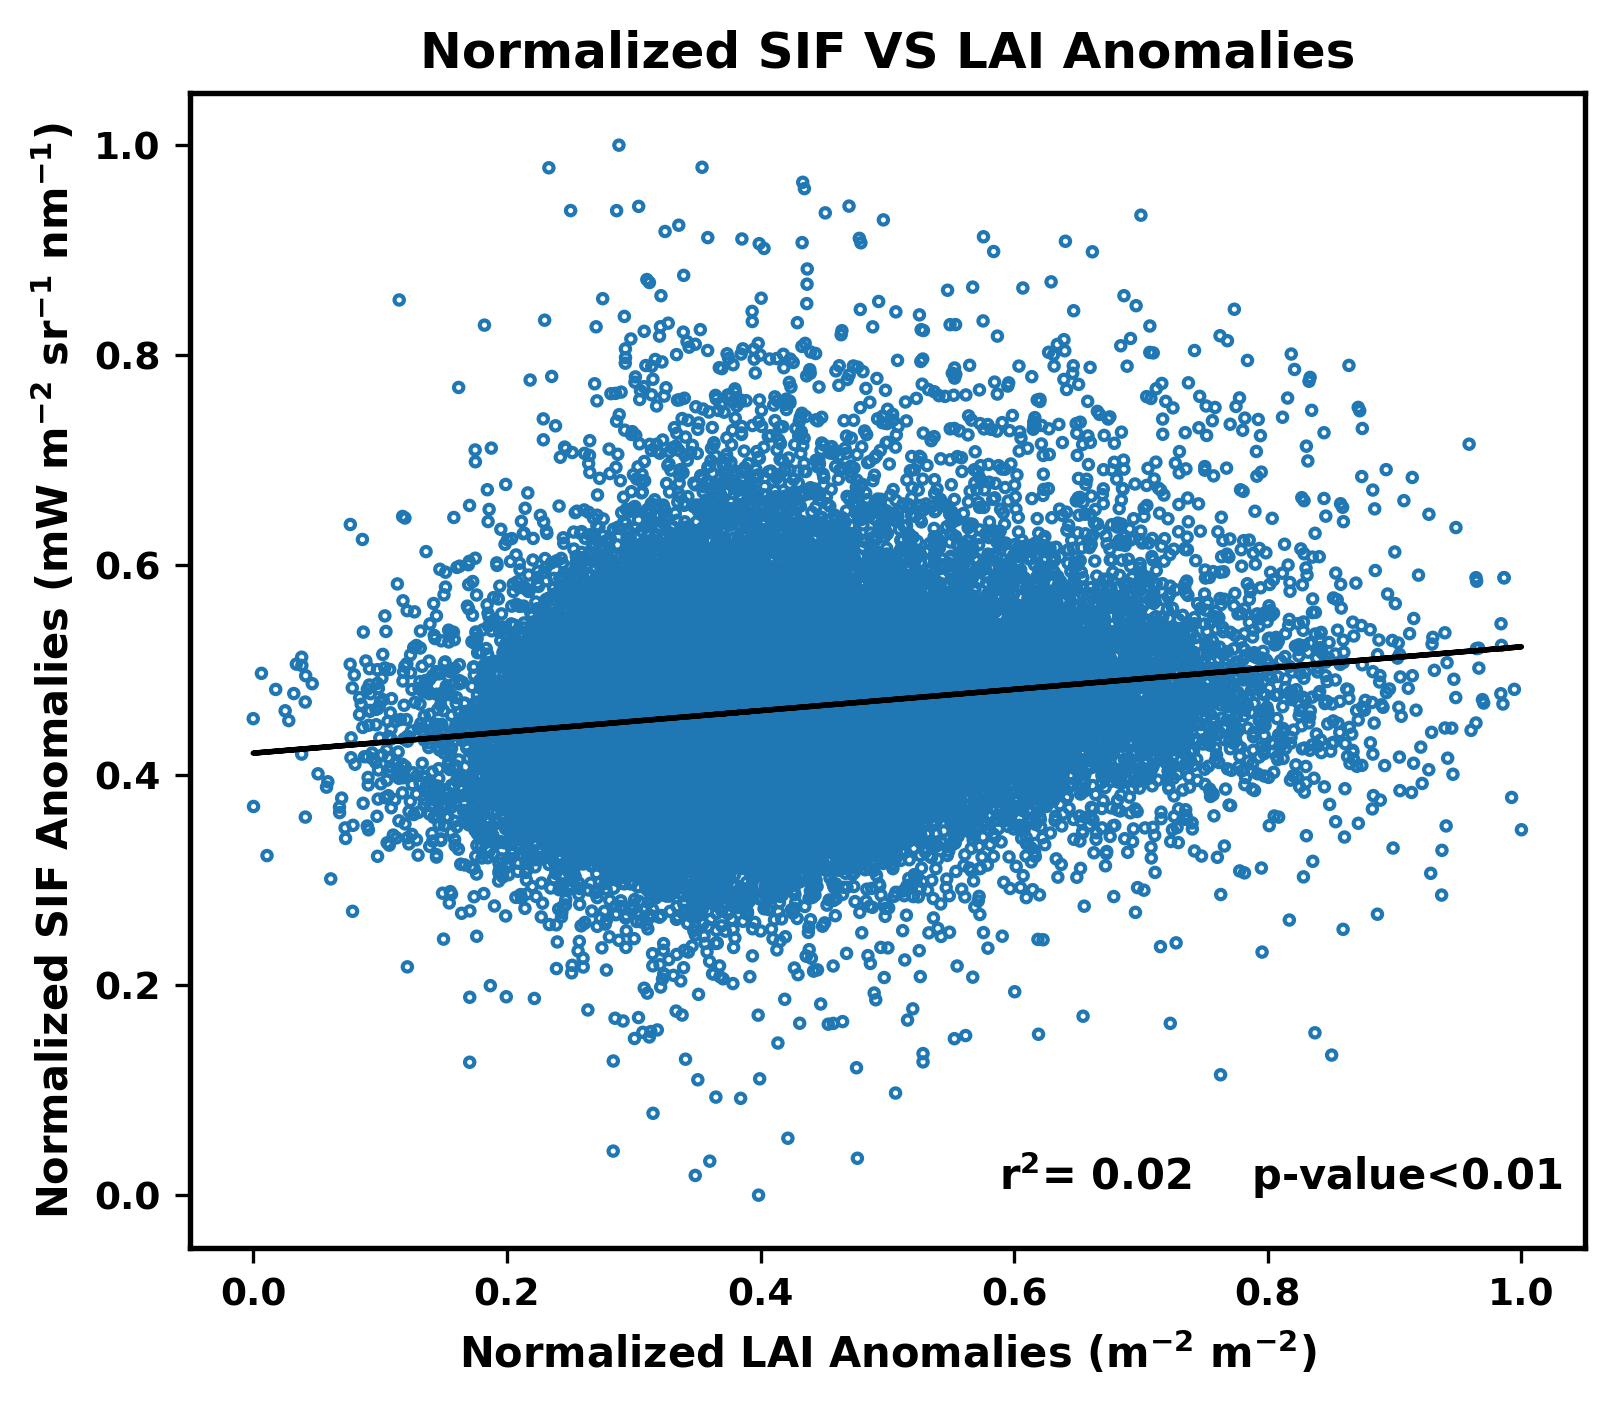

In [26]:
from sklearn.preprocessing import MinMaxScaler
fig, ax = plt.subplots(1,1,dpi=300,figsize=(6,5))
z0_clean = z0[~np.isnan(z2)]
z0_clean1 = z0_clean[~np.isnan(z0_clean)]
z2_clean = z2[~np.isnan(z0)]
z2_clean1 = z2_clean[~np.isnan(z2_clean)]
scaler = MinMaxScaler()
z0_sta = scaler.fit_transform(z0_clean1.reshape(-1, 1)).flatten()
z2_sta = scaler.fit_transform(z2_clean1.reshape(-1, 1)).flatten()
res = stats.linregress(z0_sta, z2_sta)

plt.plot(z0_sta, res.intercept+res.slope*z0_sta, color='black', linestyle='-', lw=1.3)
plt.text(0.58, 0.05, f"$\mathbf{{r^2}}$= {res.rvalue**2:.2f}    $\mathbf{{p}}$-value<0.01", transform=ax.transAxes,fontweight='bold')
plt.scatter(z0_sta, z2_sta, s=5, facecolors='none', edgecolors='tab:blue')

plt.ylabel('Normalized SIF Anomalies (mW m$\mathbf{^{-2}}$ sr$\mathbf{^{-1}}$ nm$\mathbf{^{-1}}$)', fontweight='bold')
plt.xlabel('Normalized LAI Anomalies (m$\mathbf{^{-2}}$ m$\mathbf{^{-2}}$)', fontweight='bold')

for spine in ax.spines.values():
    spine.set_linewidth(1.3)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, fontweight='bold')
ax.set_title('Normalized SIF VS LAI Anomalies',fontweight='bold')

/tmp/ipykernel_3071752/1690644339.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, fontweight='bold')
/tmp/ipykernel_3071752/1690644339.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, fontweight='bold')


Text(0.5, 1.0, 'Normalized SIF VS NDVI Anomalies')

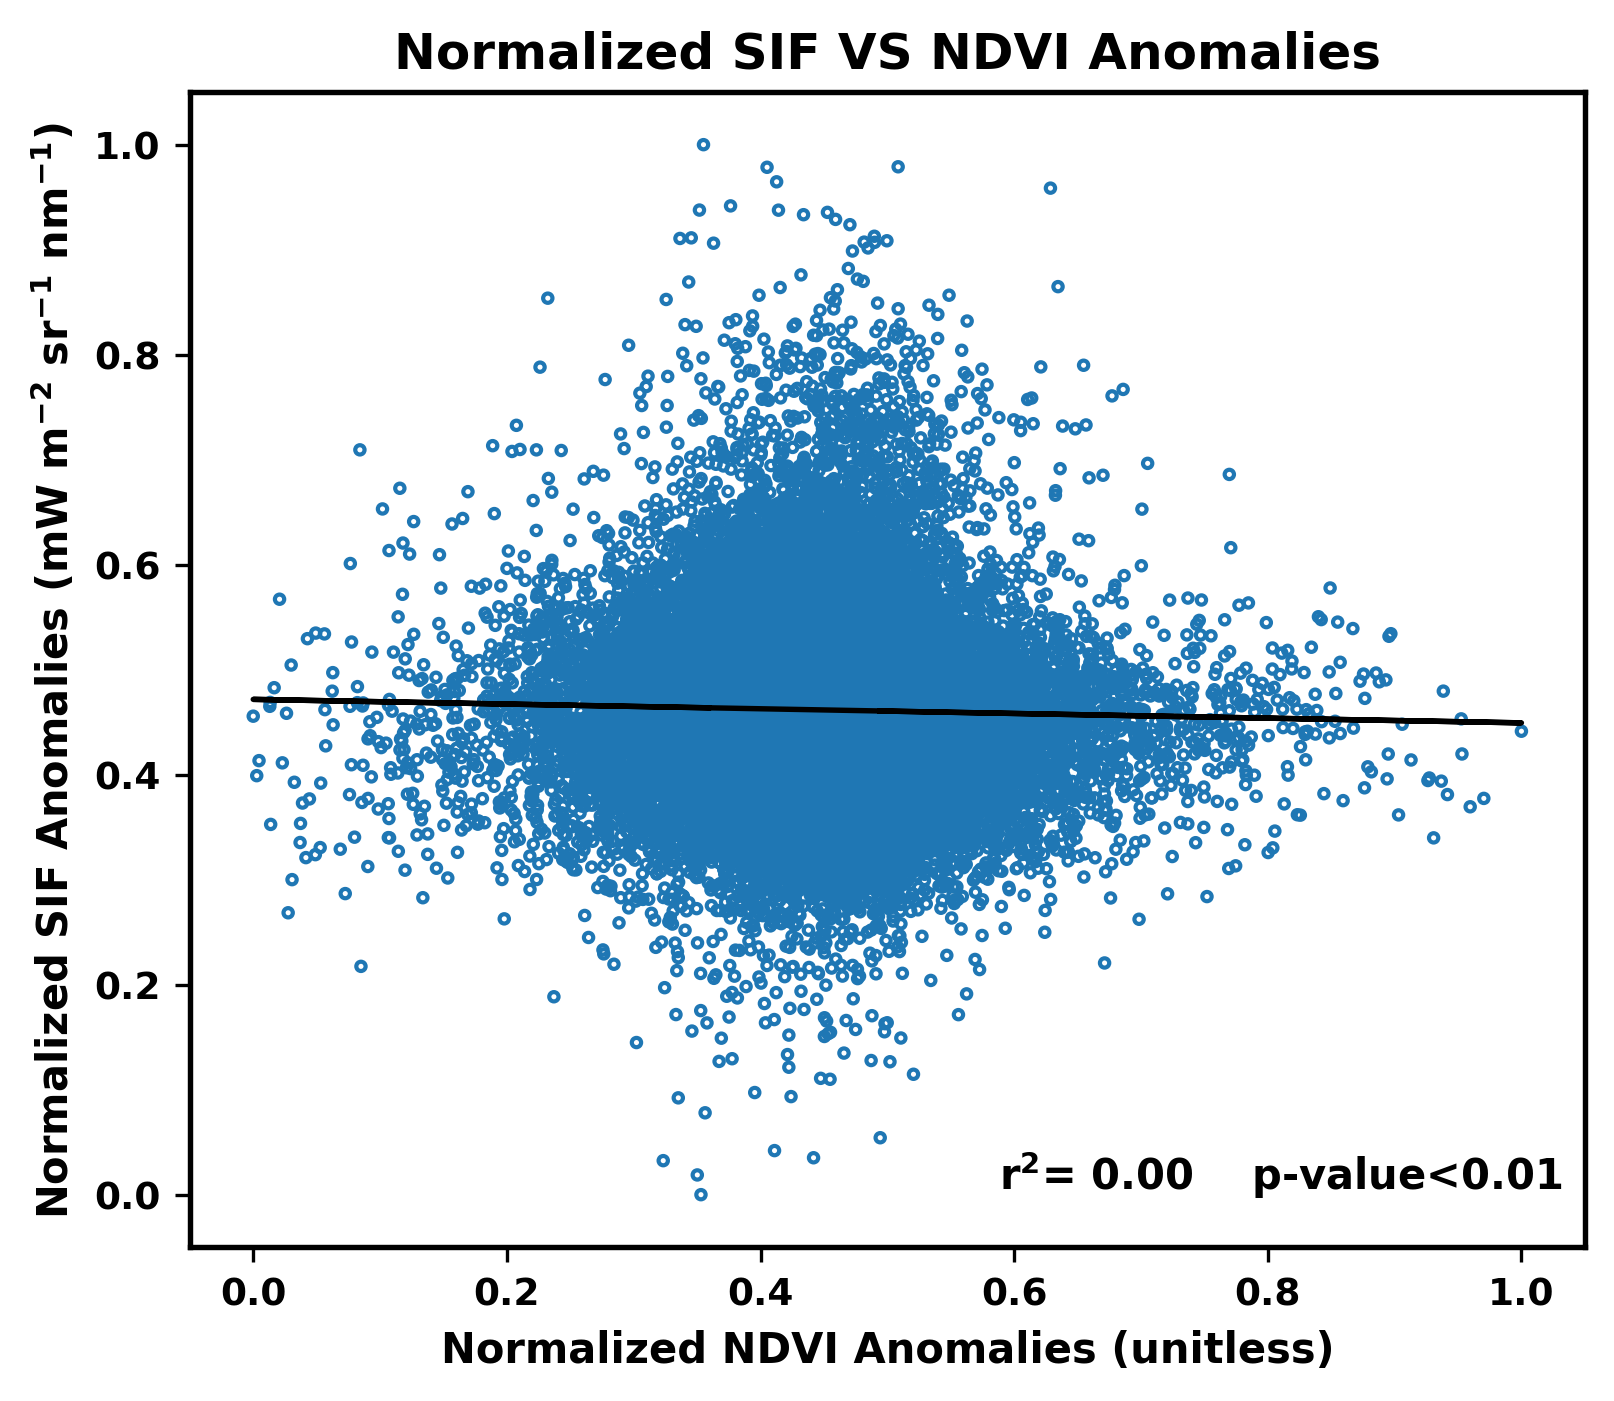

In [27]:
from sklearn.preprocessing import MinMaxScaler
fig, ax = plt.subplots(1,1,dpi=300,figsize=(6,5))
z1_clean = z1[~np.isnan(z2)]
z1_clean1 = z1_clean[~np.isnan(z1_clean)]
z2_clean = z2[~np.isnan(z1)]
z2_clean1 = z2_clean[~np.isnan(z2_clean)]
scaler = MinMaxScaler()
z1_sta = scaler.fit_transform(z1_clean1.reshape(-1, 1)).flatten()
z2_sta = scaler.fit_transform(z2_clean1.reshape(-1, 1)).flatten()
res = stats.linregress(z1_sta, z2_sta)

plt.plot(z1_sta, res.intercept+res.slope*z1_sta, color='black', linestyle='-', lw=1.3)
plt.text(0.58, 0.05, f"$\mathbf{{r^2}}$= {res.rvalue**2:.2f}    $\mathbf{{p}}$-value<0.01", transform=ax.transAxes,fontweight='bold')
plt.scatter(z1_sta, z2_sta, s=5, facecolors='none', edgecolors='tab:blue')
plt.ylabel('Normalized SIF Anomalies (mW m$\mathbf{^{-2}}$ sr$\mathbf{^{-1}}$ nm$\mathbf{^{-1}}$)', fontweight='bold')
plt.xlabel('Normalized NDVI Anomalies (unitless)', fontweight='bold')
for spine in ax.spines.values():
    spine.set_linewidth(1.3)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, fontweight='bold')
ax.set_title('Normalized SIF VS NDVI Anomalies',fontweight='bold')

/tmp/ipykernel_3071752/3690125769.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, fontweight='bold')
/tmp/ipykernel_3071752/3690125769.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, fontweight='bold')


Text(0.5, 1.0, 'Normalized ET VS LAI Anomalies')

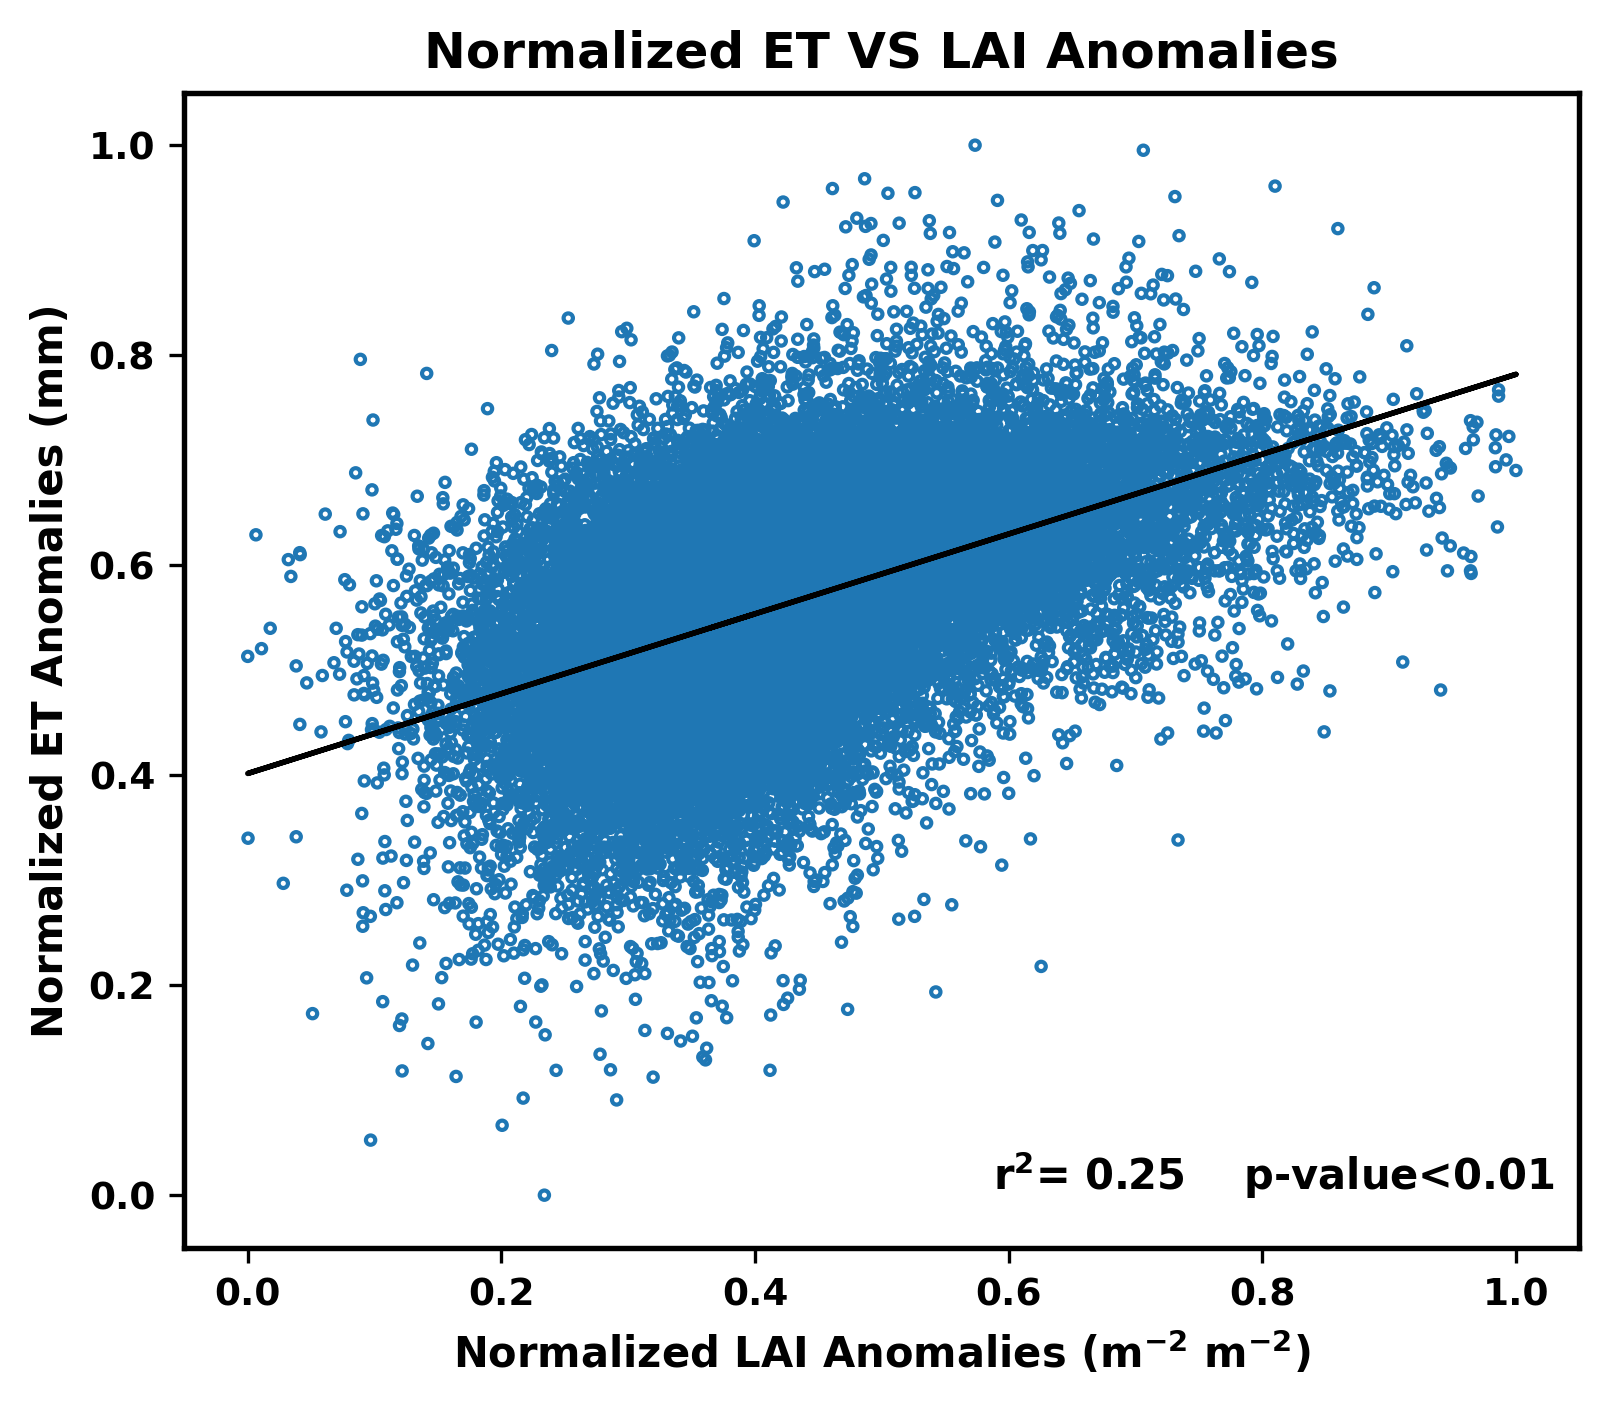

In [25]:
from sklearn.preprocessing import MinMaxScaler
fig, ax = plt.subplots(1,1,dpi=300,figsize=(6,5))
z0_clean = z0[~np.isnan(z3)]
z0_clean1 = z0_clean[~np.isnan(z0_clean)]
z3_clean = z3[~np.isnan(z0)]
z3_clean1 = z3_clean[~np.isnan(z3_clean)]
scaler = MinMaxScaler()
z0_sta = scaler.fit_transform(z0_clean1.reshape(-1, 1)).flatten()
z3_sta = scaler.fit_transform(z3_clean1.reshape(-1, 1)).flatten()
res = stats.linregress(z0_sta, z3_sta)

plt.plot(z0_sta, res.intercept+res.slope*z0_sta, color='black', linestyle='-', lw=1.3)
plt.text(0.58, 0.05, f"$\mathbf{{r^2}}$= {res.rvalue**2:.2f}    $\mathbf{{p}}$-value<0.01", transform=ax.transAxes,fontweight='bold')
plt.scatter(z0_sta, z3_sta, s=5, facecolors='none', edgecolors='tab:blue')
plt.ylabel('Normalized ET Anomalies (mm)', fontweight='bold')
plt.xlabel('Normalized LAI Anomalies (m$\mathbf{^{-2}}$ m$\mathbf{^{-2}}$)', fontweight='bold')
for spine in ax.spines.values():
    spine.set_linewidth(1.3)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, fontweight='bold')
ax.set_title('Normalized ET VS LAI Anomalies',fontweight='bold')

/tmp/ipykernel_3071752/3633765078.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, fontweight='bold')
/tmp/ipykernel_3071752/3633765078.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, fontweight='bold')


Text(0.5, 1.0, 'Normalized ET VS NDVI Anomalies')

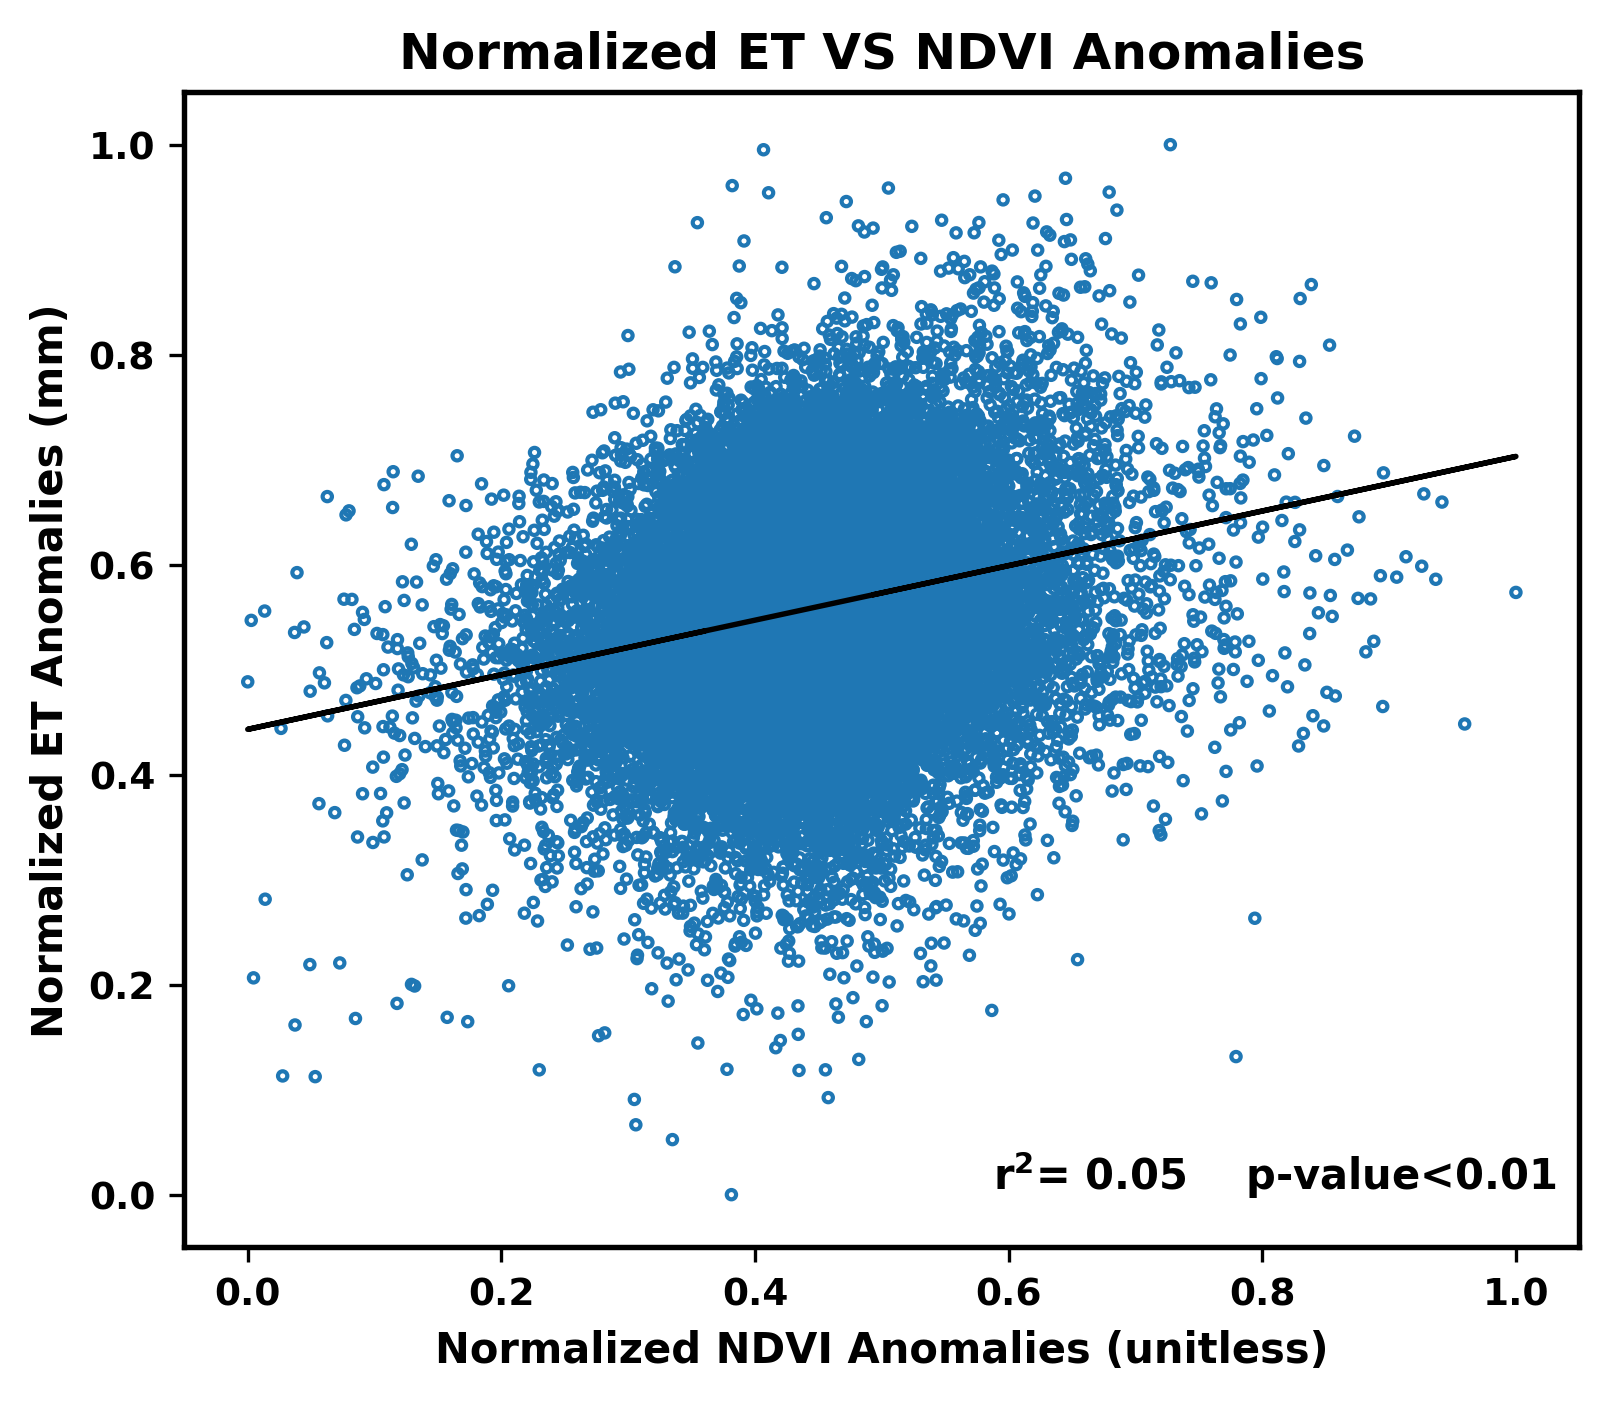

In [28]:
from sklearn.preprocessing import MinMaxScaler
fig, ax = plt.subplots(1,1,dpi=300,figsize=(6,5))
z1_clean = z1[~np.isnan(z3)]
z1_clean1 = z1_clean[~np.isnan(z1_clean)]
z3_clean = z3[~np.isnan(z1)]
z3_clean1 = z3_clean[~np.isnan(z3_clean)]
scaler = MinMaxScaler()
z1_sta = scaler.fit_transform(z1_clean1.reshape(-1, 1)).flatten()
z3_sta = scaler.fit_transform(z3_clean1.reshape(-1, 1)).flatten()
res = stats.linregress(z1_sta, z3_sta)

plt.plot(z1_sta, res.intercept+res.slope*z1_sta, color='black', linestyle='-', lw=1.3)
plt.text(0.58, 0.05, f"$\mathbf{{r^2}}$= {res.rvalue**2:.2f}    $\mathbf{{p}}$-value<0.01", transform=ax.transAxes,fontweight='bold')
plt.scatter(z1_sta, z3_sta, s=5, facecolors='none', edgecolors='tab:blue')
plt.ylabel('Normalized ET Anomalies (mm)', fontweight='bold')
plt.xlabel('Normalized NDVI Anomalies (unitless)', fontweight='bold')
for spine in ax.spines.values():
    spine.set_linewidth(1.3)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, fontweight='bold')
ax.set_title('Normalized ET VS NDVI Anomalies',fontweight='bold')